<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Diplomado de Análisis de datos y Machine Learning en Python - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="mailto:semilleroscen@udea.edu.co"> ✉ Semilleros Facultad de Ciencias Exactas y Naturales </a><br>

Versión actualizada: 5-09-2020
</div>

<br>

**El presente curso hace parte del centro de Big Data de la Facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 4 horas los días sábado por Google Meet. Para un total de dedicación temporal de 45 horas. El curso cuenta con los siguientes módulos:

1. Introducción a Python (9H)
2. Datos y pre-procesado (9H)
3. Análisis exploratorio (9H)
4. Desarrollo del modelo (9H)
5. Machine learning (9H)



# **Modelos basados en datos y Machine Learning**

Inteligencia Artificial

-Software 1.0 Basado en Expertos

-Software 2.0 Basado en Experiencia (Machine Learning)
Tengo que tener datos y la respuesta correcta

Machine Learning

-Shallow Learning (Arboles de Decisión, Support Vector Machine SVM, Bosques Aleatorios)

-Deep Learning (Representaciones complejas, Redes Neuronales)

## Modelos que se pueden construir


¿Qué es un modelo derivado de los datos?

Caso ideal: Sabemos las distribuciones de las que vienen los datos. ⇒ podemos calcular analíticamente nuestro modelo.

¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?



In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)

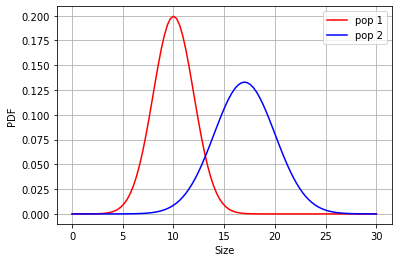

In [3]:
x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

**Cálculo de la frontera óptima** (conocida también como _frontera bayesiana_).

frontera óptima en 13.15


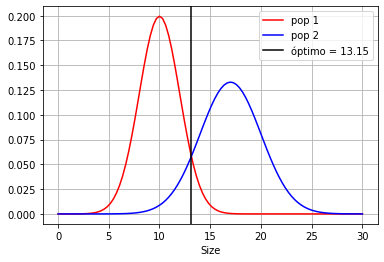

In [4]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.xlabel('Size')
plt.ylabel
('PDF')
plt.grid()
plt.legend();

Cálculo analítico de los errores de clasificación

In [5]:
print ("pop 1 error", 1-d1.cdf(minx))
print ("pop 2 error", d2.cdf(minx))

pop 1 error 0.05773516274534907
pop 2 error 0.09957961739117976


### Caso 1D

**Caso real**: Tenemos una muestra de los datos 

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera qusiéramos obtener?

In [6]:
# Función para construir y graficar datasets con dos grupos, rojos y azules, en una dimensión
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    from sklearn.tree import DecisionTreeClassifier
    plt.figure(figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
        plt.plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        plt.plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        plt.scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        plt.scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
    plt.axis("off")

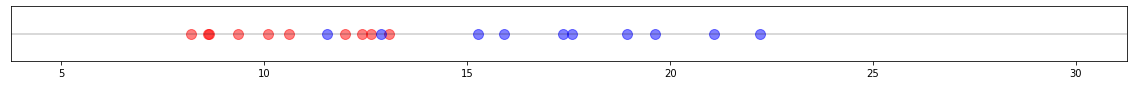

In [7]:
show_1D_dataset_samples(10, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

Veamos como se puede mejorar la definición de la frontera a medida que aumentamos la cantidad de muestras.

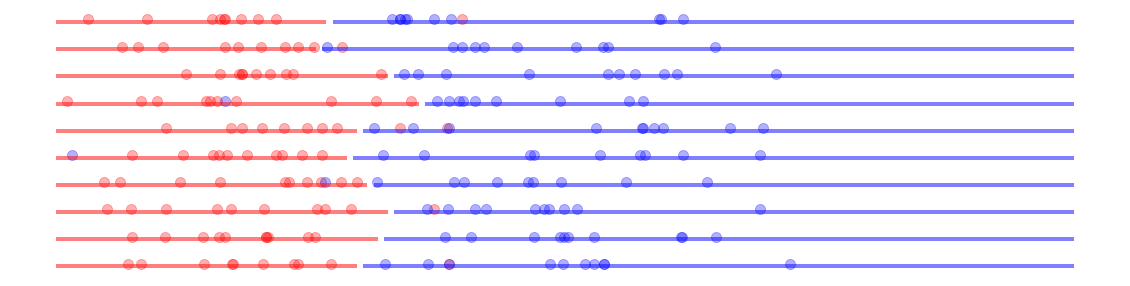

In [8]:
show_1D_dataset_samples(10, dot_alpha=.3)

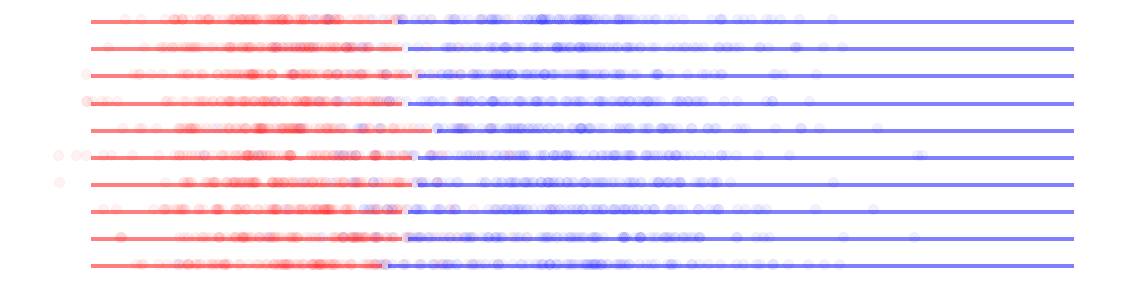

In [9]:
show_1D_dataset_samples(100, dot_alpha=.05)

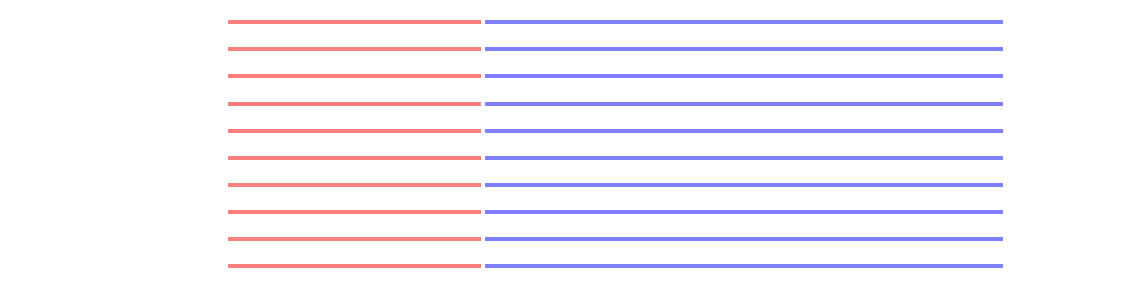

In [10]:
show_1D_dataset_samples(100000, dot_alpha=.001)

### Caso en 2D

- En 2D, un modelo de clasificación **es una frontera** en el plano


- **Objetivo:** hallar la frontera que produce menos error de clasificación


In [11]:
# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"

--2022-03-19 13:21:49--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py’

mlutils.py          100%[===================>]  10.44K  --.-KB/s    in 0.001s  

2022-03-19 13:21:49 (18.1 MB/s) - ‘mlutils.py’ saved [10691/10691]



In [12]:
import mlutils 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Muestreo de datos "pseudoaleatoria" para clasificar en dos grupos: rojos, azules

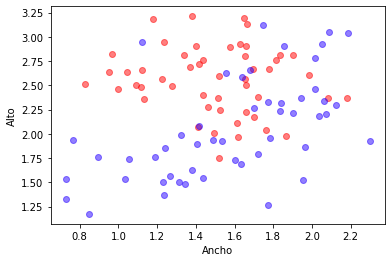

In [13]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0.1,.2]])
X,y = mc.sample(100)
mlutils.plot_2Ddata(X, y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador lineal

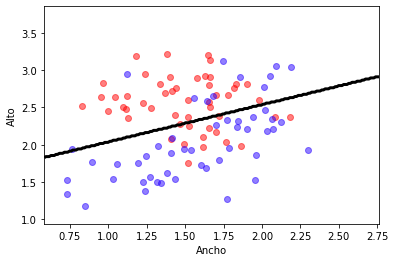

In [14]:
from sklearn.linear_model import LogisticRegression
estimador=LogisticRegression()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador bosque aleatorio

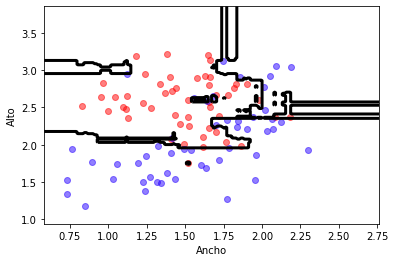

In [15]:
from sklearn.ensemble import RandomForestClassifier
estimador=RandomForestClassifier()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador máquina de soporte vectorial

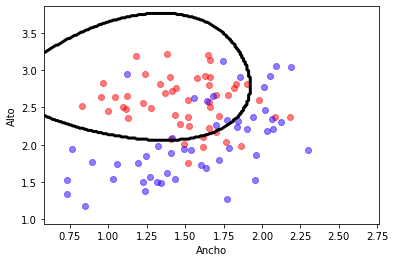

In [16]:
from sklearn.svm import SVC
estimador=SVC()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

**Los algoritmos de machine learning:**

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana. O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

## Terminología
Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.


La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica** (Feature): A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usa atributo y característica indistintamente). Algunas características pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

Otros términos que utilizaremos frecuentemente son:

* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.




## Aprendizaje supervisado



El aprendizaje supervisado implica de alguna manera modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión: En clasificación se tienen etiquetas discretas, mientras que en la regresión, las etiquetas son cantidades continuas.

### Clasificación: Prediciendo etiquetas discretas.

En clasificación, tenemos un conjunto de puntos etiquetados y deseamos utilizarlos para clasificar algunos puntos no etiquetados. Imaginemos que tenemos los datos que se muestran en la siguiente figura

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-1.png)

Tenemos dos características para cada punto, representadas por las posiciones (x, y). Además, tenemos una de las dos etiquetas de clases para cada punto, representadas por los colores de los puntos. A partir de estas características y etiquetas, nos gustaría crear un modelo que nos permita decidir si un nuevo punto debe etiquetarse como "azul" o "rojo". Un posible modelo es asumir que los dos grupos pueden separarse dibujando una línea recta a través del plano entre ellos, de modo que los puntos a cada lado de la línea caen en el mismo grupo.

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-2.png)

Este modelo es una versión cuantitativa del enunciado "una línea recta separa las clases", mientras que los parámetros del modelo son los números que describen la ubicación y orientación de la línea. Los valores óptimos para estos parámetros se aprenden de los datos (este es el "aprendizaje" en ML), que a menudo se denomina *entrenar el modelo*. Ahora que el modelo ha sido entrenado, se puede generalizar a datos nuevos sin etiquetas. Esta etapa generalmente se llama *predicción*.


## Aprendizaje no supervisado



El aprendizaje no supervisado implica modelos que describen datos sin referencia a cualquier etiqueta conocida. Un caso común de aprendizaje no supervisado es el de *agrupamiento* (clustering) en el que los datos se asignan automáticamente a un cierto número de grupos discretos. Por ejemplo, podríamos tener algunos datos bidimensionales

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-1.png)

A simple vista, está claro que cada uno de estos puntos es parte de un grupo distinto. Dada esta entrada, un modelo de agrupamiento utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados, con un resultado como el siguiente

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-2.png)

Algunos algoritmos de aprendizaje no supervisado son:

* Agrupamiento
  * Jerárquico
  * Basado en densidad
  * k-medias

* Visualización y reducción dimensional


## Observaciones acerca de los datos

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos de entrenamiento!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características para el entrenamiento. Este proceso se conoce como ingeniería de características. 

### ¡Los datos son más importantes que los algoritmos!

#**Introducción a Scikit-Learn**




## Generalidades

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es [Scikit-Learn](https://scikit-learn.org/stable/), un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro. Ya habíamos visto un ejemplo de un estimador cuando realizamos el llenado de valores nulos con `SimpleImputer` (La estrategía de llenado, en este caso "most frequent", es un ejemplo de un hiperparámetro)


In [17]:
#from sklearn.impute --> submodulo están los imputer

In [18]:
X[0:2]

array([[1.70239906, 2.1691861 ],
       [1.76465277, 2.03491688]])

In [19]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='most_frequent') #inicialización ¿qué es lo que se va hacer?
imputer_fit = imputer.fit(X) #Calcular los parametros desde X,y (datos)

In [20]:
#imputer_fit --> calcular los remplazos para nulos más adecuados

* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`

In [21]:
imp = SimpleImputer(strategy='most_frequent')
transformed_data = pd.DataFrame(imp.fit_transform(X))

In [22]:
X[0:2,0:2] = np.nan

In [23]:
X[0:5,0:5] 

array([[       nan,        nan],
       [       nan,        nan],
       [1.51970993, 2.59759997],
       [1.1159233 , 2.4832567 ],
       [1.51990868, 1.7496512 ]])

In [24]:
imp.fit_transform(X)[0:5,0:5]

array([[0.7279168 , 1.17387256],
       [0.7279168 , 1.17387256],
       [1.51970993, 2.59759997],
       [1.1159233 , 2.4832567 ],
       [1.51990868, 1.7496512 ]])

* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos; Estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que veremos más adelante es un ejemplo de un predictor)


## Tratamiento de datos

ML se trata de crear modelos a partir de datos. Por esta razón, comenzaremos discutiendo algunos aspectos necesarios del tratamiento de los datos previos a la aplicación del algoritmo de ML en sklearn

In [25]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


### Datos de entrenamiento y de prueba

Comencemos por crear la matrix de características **X** y el vector (serie) de etiquetas **y**. Supongamos que en este caso queremos predecir la característica "age":

In [26]:
len(df.columns)

15

In [27]:
X = df.drop("age", axis=1)
X.shape

(48842, 14)

In [28]:
y = df["age"]
y.shape

(48842,)




Generalmente se elige el 20% de los datos para la prueba y el resto para el entrenamiento. Los datos se deben dividir eligiendo los datos de manera aleatoria. Existen varias maneras de realizar este proceso

   1) Crear una función que seleccione el 20% de los datos aleatoriamente.
      
   2) De la librería `sklearn.model_selection` usar las funciones:
      
      * train_test_split
       
      * StratifiedShuffleSplit 
      
La primera función dividirá los datos en los mismos índices (esto es muy útil, por ejemplo, si tenemos un DataFrame separado para las etiquetas). La segunda función hace lo que se conoce como un muestreo estratificado, el cual se usa en el caso de que no haya suficientes datos y queramos evitar introducir sesgos




In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Cuando tengamos una cantidad de datos tal que estemos seguros que no introduciremos un sesgo
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random_state nos permite establecer una semilla 

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


In [31]:
len(X)*0.8,len(X)*0.2

(39073.6, 9768.4)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=40)
k=0
for train_index, test_index in s.split(X,y):
  k+=1
  print(k)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
  
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

1
2
3
4
5
(39073, 14) (39073,)
(9769, 14) (9769,)


### Conversión de variables categóricas

Para la conversión de variables categóricas, sklearn ofrece los módulos `OrdinalEncoder` y `OneHotEncoder`

In [33]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [34]:
df[["education"]]

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors
...,...
48837,Bachelors
48838,HS-grad
48839,Bachelors
48840,Bachelors


In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df[["education"]])
df_cat_encoded

array([[ 9.],
       [ 9.],
       [11.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [36]:
df[["sex"]] #--> dummines

,sex
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
48837,Female
48838,Male
48839,Male
48840,Male


In [37]:
pd.get_dummies(df[["sex"]])

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,0,1
48840,0,1


In [38]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
#cat_encoder = OneHotEncoder(sparse=False)

In [39]:
cat_encoder.fit(df[["sex"]])
df_cat_1hot = cat_encoder.transform(df[["sex"]])
df_cat_1hot

<48842x2 sparse matrix of type '<class 'numpy.float64'>'
	with 48842 stored elements in Compressed Sparse Row format>

Por defecto el `OneHotEncoder` retorna una matriz dispersa (sparse). Muchos de los estimadores de Sklearn aceptan entradas de este tipo al ajustar y evaluar modelos. 

### Escalado de características

Los algoritmos de ML no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes (o en algunos casos las entradas deben estar normalizadas). Para resolver esto, Scikit-Learn tiene dos funciones para que todos los atributos tengan la misma escala: 

* Normalización  
$$
x'=\frac{x-x_{min}}{x_{max}-x_{min}}.
$$ 




In [40]:
df['age'].describe()

count    48842.000000
mean         1.771078
std          1.295378
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: age, dtype: float64

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[0.5 ],
       [0.75],
       [0.5 ],
       ...,
       [0.5 ],
       [0.5 ],
       [0.25]])

In [42]:
pd.Series(scaler.fit_transform(df["age"].values.reshape((-1,1))).reshape((-1))).describe()

count    48842.000000
mean         0.442770
std          0.323845
min          0.000000
25%          0.250000
50%          0.500000
75%          0.750000
max          1.000000
dtype: float64

* Estandarización:
$$
    x'=\frac{x-\bar x}{\sigma}
$$

In [43]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[ 0.17672381],
       [ 0.94870704],
       [ 0.17672381],
       ...,
       [ 0.17672381],
       [ 0.17672381],
       [-0.59525942]])

In [44]:
pd.Series(sscaler.fit_transform(df["age"].values.reshape((-1,1))).reshape((-1))).describe()

count    4.884200e+04
mean    -1.553935e-15
std      1.000010e+00
min     -1.367243e+00
25%     -5.952594e-01
50%      1.767238e-01
75%      9.487070e-01
max      1.720690e+00
dtype: float64

In [45]:
sscaler = StandardScaler()
sscaler.fit_transform(df["age"].values.reshape((-1,1)))

array([[ 0.17672381],
       [ 0.94870704],
       [ 0.17672381],
       ...,
       [ 0.17672381],
       [ 0.17672381],
       [-0.59525942]])

### Pipeline

Un *Pipeline* es una secuencia de transformaciones que se utilizan para automatizar flujos de trabajo. Los pipelines son muy comunes en los sistemas de ML, ya que hay muchos datos para manipular y muchas transformaciones de datos para aplicar. Sklearn proporciona la clase `Pipeline`. En el siguiente ejemplo crearemos un pipeline para 

1) Reemplazar los valores nulos por la media 

2) Estandarizar los datos.


In [47]:
from sklearn.pipeline import Pipeline

In [48]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [49]:
df_age_pipe = num_pipeline.fit_transform(df[["age"]])

In [50]:
trans_age = pd.DataFrame(df_age_pipe)
trans_age

,0
0,0.176724
1,0.948707
2,0.176724
3,0.948707
4,-0.595259
...,...
48837,0.176724
48838,1.720690
48839,0.176724
48840,0.176724


In [51]:
trans_age.isna().all()

0    False
dtype: bool

In [52]:
trans_age.std()

0    1.00001
dtype: float64

In [53]:
trans_age.mean()

0   -1.553935e-15
dtype: float64

# **Regresión lineal**

 

## Regresión lineal simple

Para iniciar nuestro estudio de los algorítmos de regresión usaremos uno de los casos más simples posibles:  la regresión lineal.

Como recordarás la ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente y a $m$ y $b$ las llamamos pendientes e intercepto.

En el ambito del ML solemos reescribir la ecuación como

$$y=w_0+w_1x$$

siendo $w_0$ y $w_1$ llamados los "parámetros del modelo"



La **pregunta** que nos haríamos sería: dados un conjunto de datos $(x,y)$, ¿Cuáles son los parámetros para una línea que mejor representan *el conjunto* de datos?

En otras palabras, queremos encontrar los $w_i$ que mínimicen el error al predecir $y$ dado un $x$

![Imagen tomada de medium.com](https://miro.medium.com/max/642/1*xxxqZtZExBJoxmYKIY-waw.png)

Existen varios algoritmos para resolver ésta tarea, el más simple es usar el algorítmo de mínimos cuadrados.

El algoritmo encuentra los parámetros que minimizan la el error cuadrado conjunto (la suma) entre nuestras predicciones y los valores reales.

![Imagen tomada de /www.jmp.com](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png)

Sklearn cuenta con una sublibrería completa para los modelos lineales llamada "linear_model".

Volvamos a nuestro dataset de autos.

In [54]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [55]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [56]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Usaremos el tamaño del motor para crear un modelo sencillo para el precio del auto.

In [57]:
df['engine-size'].values.shape

(201,)

In [58]:
df['engine-size'].values.reshape(-1,1).shape

(201, 1)

In [59]:
#separemos nuestros datos en features y label
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [ ]:
X.shape, y.shape

((201, 1), (201, 1))

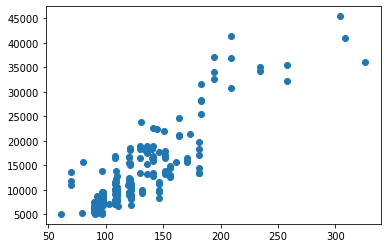

In [60]:
plt.scatter(X,y)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [65]:
#Limpieza de los datos
#Analisis de los datos
#Preprocesado de datos

#Creación de un modelo:
#División X --> feature y --> target
#División (X,y)train - (X,y)test
#Inicializar el predictor

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [67]:
len(X),len(X_train),len(X_test)

(201, 160, 41)

In [68]:
linear  = LinearRegression(normalize=True)

In [69]:
linear.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [70]:
y_pred = linear.predict(X_train)

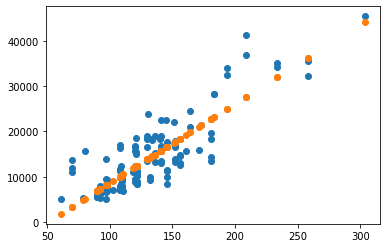

In [71]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred)

In [72]:
print('R2 =',linear.score(X_train,y_train))
print('R2 =',linear.score(X_test,y_test))

R2 = 0.7521659416378625
R2 = 0.7735450111026794


In [ ]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

w1 = [[174.5482757]]
w0 = [-8836.38107893]


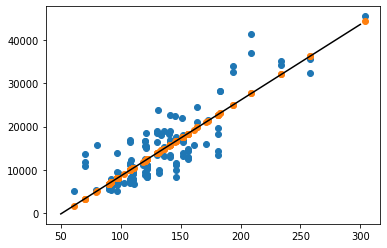

In [73]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred)
new_x=np.linspace(50,300,3)
new_y=linear.coef_[0,0]*new_x+linear.intercept_[0]
plt.plot(new_x,new_y,c='k')

In [74]:
y_pred_2 = linear.predict(X_test)

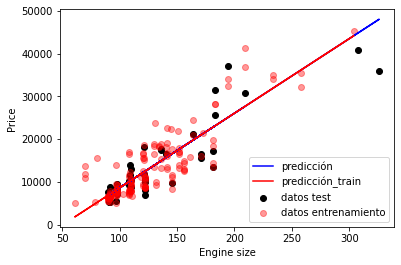

In [75]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred_2, color='blue',label=r'predicción')
plt.plot(X_train, y_pred, color='red',label=r'predicción_train')
plt.legend(loc='lower right')

plt.xlabel(r'Engine size')
plt.ylabel(r'Price')

plt.show()

In [84]:
np.sqrt(((y_test-y_pred_2)**2).mean())/y_test.mean()

0.3002841502049587

In [ ]:
np.sqrt(((y_test-y_pred_2)**2).mean())/y.mean()

0.3263439147645202

In [85]:
(np.abs(y_test-y_pred_2)/y_test).mean()

0.21432235368054023


## Regresión lineal multiple


Normalmente los problemas de ML no son tan simples y los datos están compuestos de muchos predictores. En éstos casos podemos usar también el algorítmo de regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:
$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el **peso** del predictor $x_i$.

En éstos casos ya no tendremos una línea si no un plano, o hiperplano como modelo.

Veamos un modelo 2D.

Usemos ahora el tamaño del motor y el peso vacío como predictores del precio.

In [86]:
for x in df.columns:
  print(x,df.dtypes[x])

symboling int64
normalized-losses int64
make object
aspiration object
num-of-doors object
body-style object
drive-wheels object
engine-location object
wheel-base float64
length float64
width float64
height float64
curb-weight int64
engine-type object
num-of-cylinders object
engine-size int64
fuel-system object
bore float64
stroke float64
compression-ratio float64
horsepower float64
peak-rpm float64
city-mpg int64
highway-mpg int64
price float64
city-L/100km float64
horsepower-binned object
diesel int64
gas int64


In [88]:
vars=[x for x in df.columns if df.dtypes[x]=='float64' or df.dtypes[x]=='int64' ]

In [89]:
vars

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'diesel',
 'gas']

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [91]:
df.dropna(inplace=True)

In [92]:
df.select_dtypes(exclude='object').columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [93]:
X = df.select_dtypes(exclude='object').drop('price',axis=1)
y = df['price']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [95]:
X.shape,y.shape

((196, 18), (196,))

In [96]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((156, 18), (40, 18), (156,), (40,))

In [97]:
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 =',linearM.score(X_train,y_train))
print('R2 =',linearM.score(X_test,y_test))

R2 = 0.8760443786653381
R2 = 0.8435359669008108


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [98]:
#price = w0 + w1*symboling + w2*normalized-losses + ... +
print('w1... w10 =',linearM.coef_)
print('w0 =',linearM.intercept_)

w1... w10 = [ 3.21614312e+01 -1.03220246e+01  1.41118840e+02 -2.23572818e+04
  4.32821190e+04  1.74105227e+02 -1.52039826e-01  1.11924260e+02
 -9.95886066e+01 -2.85373944e+03  6.92164686e+02  2.32587030e+01
  1.80134818e+00  2.27747260e+01  2.17008482e+02  1.52150525e+03
 -1.84019329e+03  1.84019329e+03]
w0 = -76507.0094388464


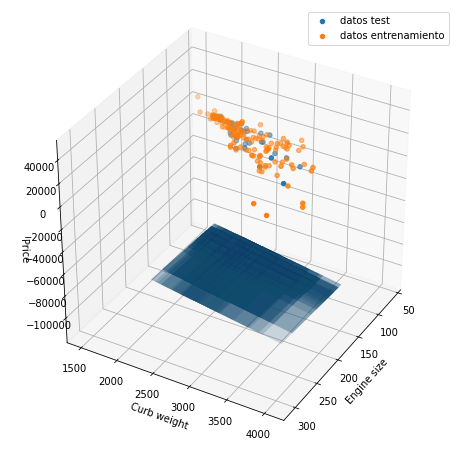

In [99]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy = np.meshgrid(X_test['engine-size'].values, X_test['curb-weight'].values)
zz = linearM.intercept_+linearM.coef_[0]*xx+linearM.coef_[1]*yy

sc = plt.figure(figsize=(8,8)).gca(projection='3d')
sc.scatter(X_test['engine-size'], X_test['curb-weight'], y_test,label=r'datos test')
sc.scatter(X_train['engine-size'], X_train['curb-weight'], y_train,label=r'datos entrenamiento')
sc.plot_surface(xx, yy, zz, alpha=0.05)
sc.legend()

sc.view_init(elev=35, azim=30)
sc.set_xlabel('Engine size')
sc.set_ylabel('Curb weight')
sc.set_zlabel('Price')
plt.show()

In [100]:
y_pred=linearM.predict(X_test)

In [102]:
(np.abs(y_test-y_pred)/y_test).mean()

0.16301441609709189

LinearRegression usa el método de mínimos cuadrados, ésto hace que los parámetros estimados dependan fuertemente de la independencia de las características.

Cuando las columnas están fuertemente correlacionadas, llamado multicolinealidad,  el algorítmo de mínimos cuadrados es altamente sensible a variaciones aleatorias en la variable diana, haciendo que la varianza sea bastante grande.



#**Métricas en la regresión lineal**


En la sesión anterior estudiamos un modelo de regresión simple, por medio del cual se hace una predicción calculando una suma ponderada de las características de entrada, más una constante llamada término de sesgo (también llamado intercepto).

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Primero necesitamos de una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. Esta medida de evaluación (función de costo) es el error calculado entre la recta generada $\hat{y}$ (o el hiperplano) a los puntos reales. El entrenamiento del modelo será entonces encontrar los valores de $w_i$ que minimicen dicha función de costo. Entre las métricas más populares encontramos:

* Error medio absoluto (MAE)

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

* Error cuadrático medio (MSE)

$$MSE=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE)

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}({\bf x})_i -y_i\right)^2}$$

Estas métricas las podemos obtener del módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn. Apliquémoslas al modelo lineal simple estudiado en la sesión anterior:

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [105]:
#separemos nuestros datos en características y etiquetas
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [107]:
#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [108]:
#entrenamos el modelo
linear = LinearRegression(normalize=True)
linear.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

Obtengamos ahora los datos predichos por el modelo y calculemos las métricas

In [109]:
y_pred = linear.predict(X_test)

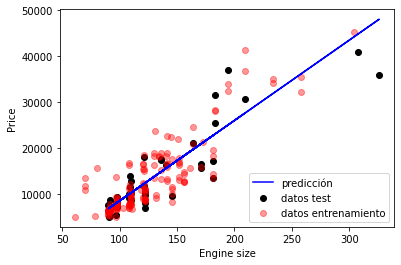

In [110]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [111]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  3017.348816752345
MSE:  18576671.47536118
RMSE:  4310.066295935734


In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred)/y_test.mean())
print('MSE: ', metrics.mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_test.mean())

MAE:  0.21021997414861238
MSE:  0.09017057086431418
RMSE:  0.3002841502049587


In [112]:
y_test_sel = y_test[:,0]
y_pred_sel = y_pred[:,0]
y_pred_sel = y_pred_sel[y_test_sel<20000]
y_test_sel = y_test_sel[y_test_sel<20000]

In [114]:
print('MAE: ', metrics.mean_absolute_error(y_test_sel, y_pred_sel)/y_test.mean())
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_sel, y_pred_sel))/y_test.mean())

MAE:  0.16455968441682847
RMSE:  0.22880770374187384


Y calculemos el coeficiente de correlación $R^2$

In [115]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7735450111026794


Comprobemos además si los errores se distribuyen según una distribución normal, lo que nos da una prueba de la validez de nuestro modelo. El siguiente se conoce como un *histograma de residuos*

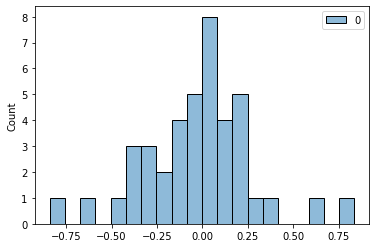

In [117]:
sns.histplot((y_test - y_pred)/y_test.mean(), bins = 20)
plt.show()

Una vez que hemos entrenado el modelo de regresión lineal las predicciones se obtienen rápidamente. La complejidad computacional es lineal con respecto a la cantidad de instancias y características sobre las que desea hacer predicciones. En otras palabras, hacer predicciones con el doble de instancias (o el doble de características) tomará aproximadamente el doble de tiempo de computo. Existen diferentes formas de entrenar un modelo de regresión lineal, más adecuado para casos en los que hay una gran cantidad de características o demasiadas instancias de entrenamiento para que quepan en memoria.





#**Regresión Logística**

Algunos algoritmos de regresión pueden ser usados para el problema de clasificación. La **Regresión Logística** se usa, comunmente, para determinar la probabilidad de que una instancia pertenezca a una clase particular. 

Supongamos que tenemos dos clases: clase A (clase positiva, etiquetada como 1) y clase B (clase negativa, etiquetada como 0). Si estimamos una probabilidad $\hat{p}$ en regresión logística, tenemos entonces que el problema de clasificación binario se trata de la siguiente forma:

\begin{equation*}
\hat{y} = \begin{cases}
1 &\hat{p}\geq0.5\\
0 &\hat{p}<0.5
\end{cases}
\end{equation*}

Sin entrar en detalles, la probabilidad estimada de $y$ dado x, es tal que 

\begin{equation}
\hat{p}=h_w(\mathbf{x})=\sigma(\mathbf{x}^T\mathbf{w})
\end{equation}

En donde, $\sigma(.)$ representa la función logística, o sigmoide, mediante la cual se obtiene un resultado que esta entre 0 y 1. En la regresión logística **la probabilidad se ajusta a una función sigmoide/logística para realizar el mapeo a probabilidades**. Esta función está definida por la ecuación:

\begin{equation}
\sigma(t)=\frac{e^{t}}{1+e^{-t}}
\end{equation}

Veamos la apariencia que presenta esta función:

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función sigmoide/logística:

def sigmoide(x):
    output = np.exp(x)/(1+np.exp(x))
    return output

Text(0.5, 1.0, 'Función logística o sigmoide')

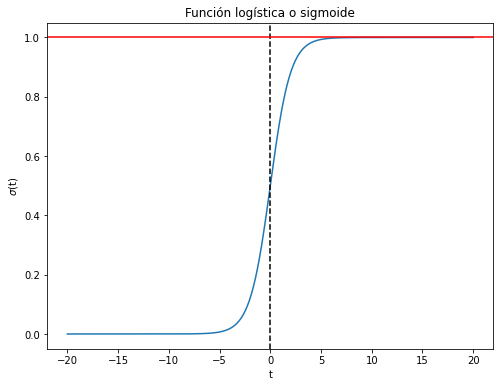

In [119]:
x = np.linspace(-20,20,400)
y=sigmoide(x)

plt.figure(figsize=(8,6))

plt.plot(x,y)
plt.axvline(x=0,color='k',linestyle='--')
plt.axhline(y=0,xmin=-15,xmax=0,color='r')
plt.axhline(y=1,xmin=0,xmax=15,color='r')
plt.xlabel("t")
plt.ylabel("$\sigma$(t)")
plt.title("Función logística o sigmoide")

obre la función sigmoide podemos advertir varias cosas:

* La función sigmoide tiende rápidamenta a cero para valores negativos.
* La función sigmoide tiende rápidamente a 1 para valores positivos.
* $\sigma(t)<0.5$ si $t<0$.
* $\sigma(t)\geq0.5$ si $t\geq0$.

De los dos últimos ítems se tiene que nuestro modelo de regresión logística predice un valor 1 si $\mathbf{x}^T\mathbf{w}$ es positivo y cero si es negativo.

### Regresión logística vs regresión lineal

Recordemos que en la **regresión lineal** se determina una función que relaciona a una variable dependiente continua, con algunos predictores (variables independientes $x_1$, $x_2$, etc.). Por ejemplo, en la regresión lineal multiple se asume una función de la forma:


\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \cdots
\end{equation}

en la que se determinan los valos de los parámetos $w$'s que minimizan el error. Lo anterior puede generalizarse como:


\begin{equation}
ℎ_w(𝑥) = \mathbf{x}^T\mathbf{w}
\end{equation}

La regresión logística es una variación de la regresión lineal, la cual resulta útil en los casos en que la variable dependiente, $\mathbf{y}$, es categórica. Como se mencionó, la regresión logística produce un resultado de la probabilidad que una instancia pertenezca a un clase dada.

La regresión logística ajusta entonces una curva en forma de "S", tomando la regresión lineal ($\mathbf{x}^T\mathbf{w}$) y transformando la estimación numérica en una probabilidad (entre 0 y 1), mediante la función sigmoide:

$$
ℎ_w(𝑥) = \sigma({\mathbf{x}^T\mathbf{w}}) =  \frac {e^{(w_0 + w_1  x_1 + w_2  x_2 +...)}}{1 + e^{(w_0 + w_1  x_1 + w_2  x_2 +\cdots)}}
$$
Or:
$$
\text{Probabilidad_Clase_1} =  P(Y=1|X) = \sigma({\mathbf{x}^T\mathbf{w}}) = \frac{e^{\mathbf{x}^T\mathbf{w}}}{1+e^{\mathbf{x}^T\mathbf{w}}} 
$$

En esta ecuación se tiene que, $\mathbf{x}^T\mathbf{w}$ es el resultado de la regresión (es decir, la suma de las variables/características pesadas por los coeficientes), `exp` representa la función exponencial, $\sigma(\mathbf{x}^T\mathbf{w})$ es la [función logística](http://en.wikipedia.org/wiki/Logistic_function).

De forma sucinta, la regresión logística toma la entrada (argumento) de la función sigmoide/logística y para obtener un resultado de probabilidades:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

**Nota**: No deje confundirse visualmente pensando que la sigmoide corresponde a la frontera de decisición. Los datos que se muestran en la gráfica anterior corresponden a dos grupos (0 y 1), y el ajuste lineal de estos es el que se pasa a la función sigmoide para mapearlos a probabilidades 


El proposito del algoritmo de __Regresión Lógistica__ es el de encontrar los parámetros $\mathbf{w}$, para  $ℎ_w(𝑥)$ = $\sigma(\mathbf{x}^T\mathbf{w})$, de tal forma que el modelo prediga más precisamente la clase en cada caso.

El modelo de regresión logística representa entonces un algoritmo apliamente usado en clasificación binaria, en los casos en que la frontera de decisión sea lineal.

Veamos a continuación el desempeño de la regresión logistica en la clasificación de tres distribuciones:

* Regresión logística en un problema de clasificación binaria con una frontera de decisición lineal.
* Regresión logística en un problema de clasificación binaria con una forntera de desición no lineal. 

### Regresión logística en un problema de clasificación binaria con una frontera de decisión lineal.

Para evaluar los casos en el que una regresión logística tiene un buen desempeño, veamos las siguientes distribuciónes de datos generadas en python:

In [121]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import matplotlib.pyplot as plt

In [122]:
# Generación de un dataset de clasificación 2d de nubes de puntos.
X, y = make_blobs(n_samples=[1000,1000], centers=None, n_features=2, cluster_std=6, random_state=202)

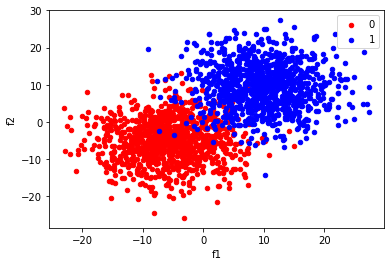

In [128]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.ylabel('f2')
plt.xlabel('f1')
plt.show()

La **apariencia del dataset** es la de una tabla con dos características, o variables independientes, y una variable objetivo, o variable dependiente:

In [ ]:
df.head(10)

Las variables independiente están etiquetadas en las columnas como las "características" $\mathbf{x}$ e $\mathbf{y}$, a pesar de que hemos insistido a lo largo del curso reservar la letra $\mathbf{y}$ para la variable objetivo o dependiente. En este caso, la variable objetivo está etiquetada como **label**.

A continuación, veamos los resultados de la clasificación derivada de una regresión logística. Los datos son graficados sobre un contorno que representa la probabilidad de pertenecer a una clase u otra:
 * Los tonos rojos, corresponden a regiones de probalidad menores a 0.5 de pertenecer a la clase 1.
 * Los tonos azules, corresponden a regiones de probabilid  mayores a 0.5 de pertenecer a la clase 1.
 * Los valores en blanco, representan la forntera de decisión, es decir donde se obtiene una probabilidad del 0.5 de pertenencia a la clase 1.

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [130]:
# División de los datos en subconjuntos de entrenamiento/evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 2) (1600,)
Test set: (400, 2) (400,)


In [131]:
# Ajuste del modelo.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

[(-22.981715497289997, 27.37181699382255),
 Text(0, 0.5, '$X_2$'),
 (-25.814445291719665, 27.365133706091257),
 Text(0.5, 0, '$X_1$'),
 None]

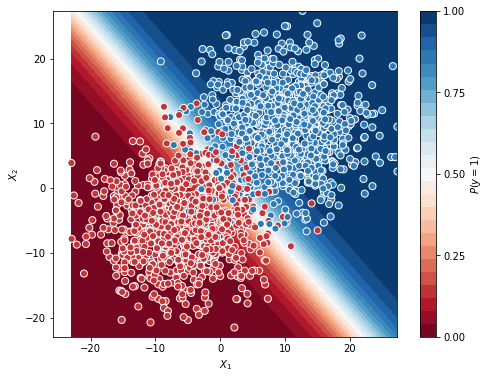

In [132]:
xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[1], X.max(0)[1]), ylim=(X.min(0)[0], X.max(0)[0]),
       xlabel="$X_1$", ylabel="$X_2$")

Evaluemos ahora la presición del modelo creado mediante regresión logística, realizando una validación cruzada:

In [133]:
LR.score(X,y)

0.9505

Accuracy=Clasificados Bien/Total

**Conclusión:** En los casos en donde la **frontera de decisión** corresponde a una **línea recta**, el algoritmo de desición logística presenta un excelente desempeño en la clasificación de los datos; de hecho, hemos obtenido un porcentaje de clasificaciones correctas del 95%, mediante una evaluación cruzada con tres folds.

## Ejercicio

De las siguiente base de datos de una empresa de telecomunicaciones, construya un modelo de regresión logítica que prediga el abandono del cliente (variable churn), siguiendo los pasos que se enumeran a continuación:

1. Cargue la base de datos de la dirección "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv" y visualice los datos.
2. Guarde en un nuevo dataset las características `['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']`. La variable churn representa el abandono; consulte el tipo de esta variable y en caso de no ser `int` convirtala a este tipo.
3. Visualice el número de elementos total de la nuevo tabla.
4. Guarde las variables predictoras (todas menos churn) como un array en una variable X y la variable objetivo (churn), como array también, en una variable y.
5. Normalice la variable x y ajuste los datos.
6. Realice un ajuste mediante regresión logística de los datos, usando 5 folds y evaluando el puntaje obtenido promedio.

In [134]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")

In [135]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [136]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [139]:
df2=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]

In [140]:
df2.shape

(200, 10)

In [141]:
X=df2.drop('churn',axis=1)
y=df2['churn'].astype(int)

In [142]:
y.value_counts()

0    142
1     58
Name: churn, dtype: int64

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 9) (160,)
Test set: (40, 9) (40,)


In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [146]:
print(X_train.iloc[:,0].mean(),X_train.iloc[:,0].std())
print(X_train_std[:,0].mean(),X_train_std[:,0].std())

35.025 21.851974854265386
6.661338147750939e-17 1.0


In [147]:
clasf=LogisticRegression(solver='liblinear',C=0.01)

In [148]:
clasf.fit(X_train_std,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [149]:
y_pred=clasf.predict(X_test_std)

In [150]:
clasf.score(X_train_std,y_train)

0.8

In [151]:
clasf.score(X_test_std,y_test)

0.675

# **Métricas de evaluación y puntajes**

Si evaluamos el rendimiento de un modelo de clasificación utilizando solo la *accuracy* (la fracción de muestras clasificadas correctamente) veremos que, en la práctica, esta métrica de evaluación puede no ser apropiada para el objetivo que se tenga. Es importante elegir la métrica correcta para seleccionar entre diferentes modelos.

Al seleccionar una métrica, siempre debe tener en mente el objetivo final de la aplicación de ML. **¡Mantenga el objetivo final en mente!**. En la práctica, generalmente estamos interesados no solo en hacer predicciones precisas, sino en usar estas predicciones como parte de un proceso de toma de decisiones más amplio.

La clasificación binaria es posiblemente la aplicación más común y conceptualmente simple del aprendizaje automático en la práctica. Antes de ver las métricas alternativas, echemos un vistazo a las formas en que la precisión de medición puede ser engañosa. Recuerde que para la clasificación binaria, a menudo hablamos de una clase positiva y una clase negativa, entendiendo que la clase positiva es la que estamos buscando.

## Tipos de error

Imaginemos una aplicación para detectar de forma temprana el cáncer mediante una prueba automatizada. Si la prueba es negativa, se supondrá que el paciente está sano, mientras que si la prueba es positiva, el paciente se someterá a una evaluación adicional. Aquí, llamaremos a una prueba positiva (una indicación de cáncer) la clase positiva, y una prueba negativa a la clase negativa. No podemos suponer que nuestro modelo siempre funcionará perfectamente; este cometerá errores. Para cualquier aplicación, debemos preguntarnos cuáles son las consecuencias de estos errores en el mundo real.

Un posible error es que un paciente sano se clasifique como positivo, lo que llevaría a pruebas adicionales. Esto conlleva algunos costos y un inconveniente para el paciente. Una predicción positiva incorrecta se llama **falso positivo**. El otro posible error es que un paciente enfermo se clasifique como negativo, por lo que no recibirá más pruebas ni tratamiento. El cáncer no diagnosticado podría conducir a problemas de salud graves e incluso podría ser fatal. Un error de este tipo (una predicción negativa incorrecta) se llama **falso negativo**.



## Datos no balanceados

Los conjuntos de datos en los que una clase es mucho más frecuente que la otra a menudo se denominan conjuntos de datos no balanceados. En realidad, los datos no balanceados son la norma, y es raro que los eventos de interés tengan una frecuencia igual o incluso similar en los datos.

Para ilustrar, crearemos un conjunto de datos desequilibrado 9:1 a partir del conjunto de datos [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), clasificando el dígito 9 contra las otras nueve clases:

In [267]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [268]:
#cargamos el dataset y separamoslos datos de entrenamiento y la variable objetivo
digits = load_digits()
digits.data.shape

(1797, 64)

In [269]:
np.unique(digits.target, return_counts=True )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [310]:
X = digits.data
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [311]:
y.shape[0] - y.sum()

1617

In [312]:
X_train[0],  y_train[0]

(array([ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
         2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
         0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
         8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.]), False)

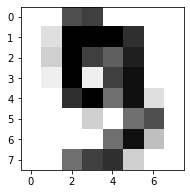

In [313]:
#mostramos el dígito 9
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[9], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [314]:
X[9], y[9]

(array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
        13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
        16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
         0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
         9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.]), True)

Podemos usar [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) para predecir siempre la clase mayoritaria ("no nueve") para ver cuál desinformativa puede ser la *accuracy*:

In [315]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Etiqueta predicha única: {}".format(np.unique(pred_most_frequent)))
print("Puntaje: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Etiqueta predicha única: [False]
Puntaje: 0.90


Comparemos esto con el uso de un clasificador real

In [316]:
from sklearn.svm import SVC

svm = SVC(gamma="auto",probability=True)
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
print("Puntaje: {:.2f}".format(svm.score(X_test, y_test)))


Puntaje: 0.90


En ambos casos obtenemos el mismo resultado. Esto podría indicar que algo está mal con la forma en que usamos SVC, o que la accuracy de hecho no es una buena medida. Evaluemos con otro modelo y esta vez, utilicemos el DummyClassifier de manera que produzca una salida aleatoria.

In [317]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Puntaje Dummy: {:.2f}".format(dummy.score(X_test, y_test)))


logreg = LogisticRegression(C=0.1, solver="liblinear")
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Puntaje LogReg: {:.2f}".format(logreg.score(X_test, y_test)))


Puntaje Dummy: 0.90
Puntaje LogReg: 0.98


In [318]:
print(dummy_majority.predict(X[9:10]))
print(svm.predict(X[9:10]))
print(dummy.predict(X[9:10]))
print(logreg.predict(X[9:10]))

[False]
[False]
[False]
[ True]


In [319]:
print(dummy_majority.predict_proba(X[9:10]))
print(svm.predict_proba(X[9:10]))
print(dummy.predict_proba(X[9:10]))
print(logreg.predict_proba(X[9:10]))

[[1. 0.]]
[[0.89506487 0.10493513]]
[[0.90126206 0.09873794]]
[[0.01905174 0.98094826]]


El clasificador Dummy es claramente el peor (según la accuracy), mientras que LogisticRegression produce muy buenos resultados. Sin embargo, incluso el clasificador aleatorio produce más del 80% de precisión. Esto hace que sea muy difícil juzgar cuál de estos resultados es realmente útil. El problema aquí es que la accuracy es una medida inadecuada para cuantificar el rendimiento predictivo en este escenario no balanceado, por lo que necesitamos métricas alternativas.

## Matriz de confusión

Una de las formas más completas de representar el resultado de evaluar la clasificación binaria es usar [matrices de confusión](https://en.wikipedia.org/wiki/Confusion_matrix). Inspeccionemos las predicciones de LogisticRegression de la sección anterior usando la función `confusion_matrix`. Ya almacenamos las predicciones sobre el conjunto de prueba en `pred_logreg`:

In [320]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


La salida de confusion_matrix es una matriz de dos por dos, donde las filas corresponden a las clases verdaderas y las columnas corresponden a las clases predichas. Cada entrada cuenta con qué frecuencia una muestra que pertenece a la clase correspondiente a la fila (aquí, "no nueve" y "nueve") se clasificó como la clase correspondiente a la columna

In [321]:
!pip install mglearn;

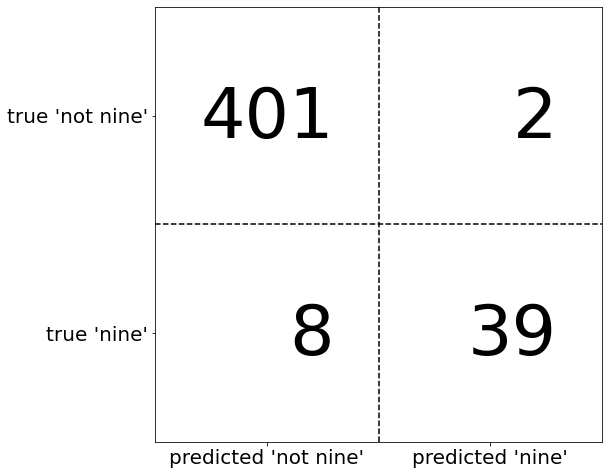

In [322]:
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

Las entradas en la diagonal principal de la matriz de confusión corresponden a las clasificaciones correctas, mientras que otras entradas nos dicen cuántas muestras de una clase se clasificaron erróneamente como otra clase.

Si declaramos "un nueve" como la clase positiva, podemos relacionar las entradas de la matriz de confusión con los términos falso positivo y falso negativo que presentamos anteriormente. Llamamos a las muestras clasificadas correctamente que pertenecen a los positivos verdaderos de clase positiva y a las muestras clasificadas correctamente que pertenecen a los negativos verdaderos de clase negativa. Estos términos generalmente se abrevian FP, FN, TP y TN y conducen a la siguiente interpretación para la matriz de confusión

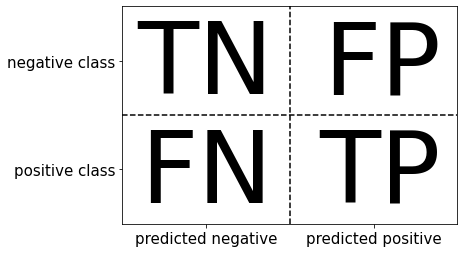

In [283]:
mglearn.plots.plot_binary_confusion_matrix()

Ahora usemos la matriz de confusión para comparar los modelos que ajustamos anteriormente

In [324]:
print("Clase más frecuente:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nmodelo Dummy:")
print(confusion_matrix(y_test, pred_dummy))
print("\nSVM:")
print(confusion_matrix(y_test, pred_svm))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Clase más frecuente:
[[403   0]
 [ 47   0]]

modelo Dummy:
[[403   0]
 [ 47   0]]

SVM:
[[403   0]
 [ 47   0]]

Logistic Regression
[[401   2]
 [  8  39]]


Mirando la matriz de confusión, es bastante claro que algo está mal con `pred_most_frequent` y `SVM`, porque siempre predicen la misma clase. `pred_dummy`, por otro lado, tiene un número muy pequeño de positivos verdaderos(5), particularmente en comparación con el número de falsos negativos y falsos positivos: hay muchos más falsos negativos que verdaderos negativos. Vemos que solo LR tiene un mejor rendimiento en todos los aspectos: tiene más positivos verdaderos y negativos verdaderos mientras que tiene menos falsos positivos y falsos negativos.

Revisar este [link](https://en.wikipedia.org/wiki/Confusion_matrix)

## Precisión y exhaustividad 

inspeccionar la matriz de confusión total es un poco engorroso, y aunque obtuvimos mucha información al observar todos los aspectos de la matriz, el proceso fue muy manual y cualitativo. Hay varias otras formas de resumir la matriz de confusión, siendo las más comunes la *precisión* y la *exhaustividad*. La precisión mide cuántas de las muestras predichas como positivas son realmente positivas:

$$\text{Precisión} = \frac{TP}{TP + FP}$$

La precisión se utiliza como una métrica de rendimiento cuando el objetivo es limitar el número de falsos positivos. 

La exhaustividad, por otro lado, mide cuántas de las muestras positivas son capturadas por las predicciones positivas:

$$\text{Exhaustividad} = \frac{TP}{TP + FN}$$

La exhaustividad se utiliza como métrica de rendimiento cuando necesitamos identificar todas las muestras positivas; es decir, cuando es importante evitar falsos negativos.

Con frecuencia hay tensión entre precisión y exhaustividad. Esto quiere decir que, al mejorar la precisión, generalmente se reduce la exhaustividad, y viceversa. Por lo tanto, si bien la precisión y la exhaustividad son medidas muy importantes, mirar solo una de ellas no proporcionará una imagen completa del problema. Una forma de resumirlos es el *puntaje f* o la *medida f*, que es la media armónica entre precisión y exhaustividad.

$$f = 2  \frac{\text{Precisión}*\text{Exhaustividad}}{\text{Precisión}+\text{Exhaustividad}}$$

Como tiene en cuenta la precisión y la exhaustividad, puede ser una mejor medida que la *accuracy* en los conjuntos de datos de clasificación binaria no balanceados. Vamos a evaluarlo en las predicciones para el conjunto de datos "nueve vs. resto" que calculamos anteriormente. Aquí, asumiremos que la clase "nueve" es la clase positiva (está etiquetada como Verdadera mientras que el resto está etiquetada como Falsa), por lo que la clase positiva es la clase minoritaria

In [325]:
from sklearn.metrics import f1_score

print("f most_frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f svm: {:.2f}".format(f1_score(y_test, pred_svm)))
print("f LG: {:.2f}".format(f1_score(y_test, pred_logreg)))

f most_frequent: 0.00
f dummy: 0.00
f svm: 0.00
f LG: 0.89


Podemos ver una distinción bastante fuerte entre las predicciones para dummy y para LG, que no estaba tan clara cuando se observaba solo la *accuracy*. Usando el puntaje f para la evaluación, resumimos nuevamente el rendimiento predictivo en un número. Sin embargo, el puntaje f parece capturar nuestra intuición de lo que es un buen modelo mucho mejor que la *accuracy*.

Si queremos un resumen más completo de precisión, exhaustividad y puntaje f, podemos usar la función `clasificación_report` para calcular los tres a la vez 

In [326]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La función `clasificación_report` produce una línea por clase (aquí, Verdadero y Falso) e informa precisión, exhaustividad y puntaje f con esta clase como clase positiva. Antes, asumíamos que la clase minoritaria "nueve" era la clase positiva. Si cambiamos la clase positiva a "no nueve", podemos ver a partir del resultado del informe de clasificación que obtenemos una puntuación f de 0,94 con el modelo most_frequent. Además, para la clase "no nueve" tenemos una exhaustividad de 1, ya que clasificamos todas las muestras como "no nueve". La última columna junto al puntaje f proporciona el soporte de cada clase, lo que simplemente significa el número de muestras en esta clase.


In [327]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [328]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



Como podemos observar al mirar los informes, las diferencias entre los modelos ficticios y un modelo muy bueno ya no son tan claras. Elegir qué clase se declara la clase positiva tiene un gran impacto en las métricas. Mientras que el puntaje f para la clasificación ficticia es 0.09 (vs. 0.89 para la regresión logística) en la clase "nueve", para la clase "no nueve" es 0.90 vs. 0.99, que parecen resultados razonables. Sin embargo, al mirar todos los números juntos obtenemos una imagen bastante precisa de los resultados, y podemos ver claramente la superioridad del modelo de regresión logística

## Estimación de incertidumbre en clasificadores

Otra parte útil de la interfaz scikit-learn de la que aún no hemos hablado es la capacidad de los clasificadores para proporcionar estimaciones de incertidumbre de las predicciones. A menudo, no solo estamos interesados en qué clase predice un clasificador para un determinado punto de prueba, sino también en la certeza de que esta es la clase correcta. Hay dos funciones diferentes en scikit-learn que se pueden usar para obtener estimaciones de incertidumbre de los clasificadores: `decision_function` y `predict_proba`.

En el caso de clasificación binaria, `decision_function` es de la forma `(n_instancias,)`. Devuelve una puntuación para cada instancia y luego realiza predicciones basadas en esas puntuaciones utilizando cualquier umbral deseado:

In [329]:
print("Forma del conjunto de prueba:", X_test.shape)
print("forma de la funcion de decisión:", logreg.decision_function(X_test).shape )

Forma del conjunto de prueba: (450, 64)
forma de la funcion de decisión: (450,)


In [330]:
#mostrar las primeras 10 entradas de la funcion de decision
print("Función de decisión:\n{}".format(logreg.decision_function(X_test)[:10]))

Función de decisión:
[-15.95969695 -11.69938255 -17.16641724 -32.6168925  -21.54064974
  -8.64950262 -22.031057     3.23049152 -12.0037343   -9.92962891]


Este valor codifica cuán fuertemente el modelo cree que un punto de datos pertenece a la clase "positiva". Los valores positivos indican una preferencia por la clase positiva, y los valores negativos indican una preferencia por la "negativa" (otra) clase. Podemos recuperar la predicción mirando solo el signo de la función de decisión

In [332]:
print("Función de decisión:\n{}".format(logreg.decision_function(X_test)[:10]))
print("Función de decisión:\n{}".format((logreg.decision_function(X_test) > 0)[0:10]))
print("Función de Sigmoide:\n{}".format(logreg.predict_proba(X_test)[0:10,1]))
print("Predicciones:\n{}".format(logreg.predict(X_test)[0:10]))

Función de decisión:
[-15.95969695 -11.69938255 -17.16641724 -32.6168925  -21.54064974
  -8.64950262 -22.031057     3.23049152 -12.0037343   -9.92962891]
Función de decisión:
[False False False False False False False  True False False]
Función de Sigmoide:
[1.17163310e-07 8.29887292e-06 3.50525571e-08 6.83382052e-15
 4.41585373e-10 1.75183280e-04 2.70416702e-10 9.61965741e-01
 6.12127332e-06 4.87074960e-05]
Predicciones:
[False False False False False False False  True False False]


El hacer predicciones puede verse como fijar el umbral para la salida de la función de decisión en un cierto punto fijo. En clasificación binaria usamos 0 (y 0.5 para `predict_proba`)

El siguiente es un ejemplo de una tarea de clasificación binaria no balanceada, con 400 puntos en la clase negativa clasificada contra 50 puntos en la clase positiva. 

In [333]:
import matplotlib.pyplot as plt
%matplotlib inline

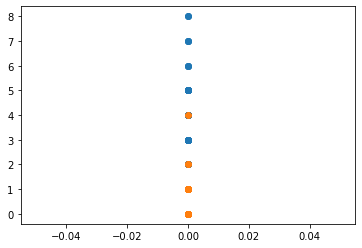

In [334]:
plt.scatter(X[y==0][:,0],X[y==0][:,1])
plt.scatter(X[y==1][:,0],X[y==1][:,1])

In [335]:
from sklearn.datasets import *

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Para la clase 1, obtenemos una exhaustividad bastante pequeña. Debido a que la clase 0 es mucho más grande, el clasificador se enfoca en hacer que la clase 0 sea correcta, y no en la clase 1 más pequeña.

Supongamos que en nuestra aplicación es más importante tener una alta exhaustividad alta para la clase 1. Esto significa que estamos dispuestos a arriesgar más falsos positivos (clase 1 falsa) a cambio de más positivos verdaderos (lo que aumentará la exhaustividad). Por defecto, los puntos con un valor de función de decisión mayor que 0 se clasificarán como clase 1. Queremos que se clasifiquen más puntos como clase 1, por lo que debemos disminuir el umbral:


True: Decision_Funcion>0, Proba>0.5

In [337]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [338]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



Como se esperaba, la exhaustividad de la clase 1 aumentó y la precisión disminuyó

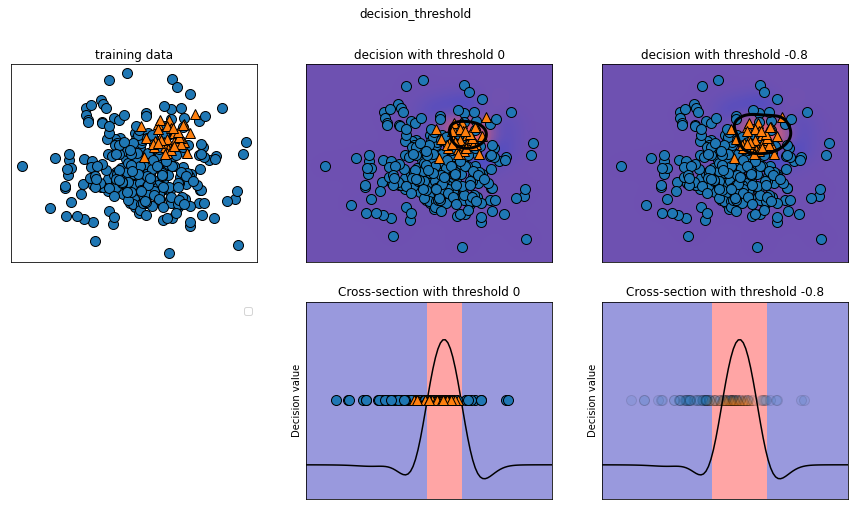

In [297]:
mglearn.plots.plot_decision_threshold()

Si se valora la precisión sobre la exhaustividad o al revés, o los datos están muy desequilibrados, cambiar el umbral de decisión es la forma más fácil de obtener mejores resultados. Como la función de decisión puede tener rangos arbitrarios, es difícil proporcionar una regla general sobre cómo elegir un umbral.

##Ejemplo multiclase

In [339]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [340]:
logreg = LogisticRegression(C=0.1, solver="liblinear")
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Puntaje LogReg: {:.2f}".format(logreg.score(X_test, y_test)))

Puntaje LogReg: 0.96


In [341]:
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.95      0.95      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.98      0.98        48
           6       0.98      1.00      0.99        52
           7       0.98      0.94      0.96        48
           8       0.94      0.92      0.93        48
           9       0.98      0.94      0.96        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [342]:
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  2  0]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]


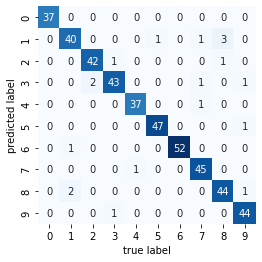

In [347]:
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('true label')
plt.ylabel('predicted label');